In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
results = pd.read_csv(
    './../../data_source/results/original_images/all_features_original_images.csv',
    index_col=0
)
results.head()

,exp_id,experiment_id,PLSREstimator__n_components,PLSREstimator__tol,StudentTTestSelection__num_features,test_score,train_score,test_score_variance,train_score_variance,feature_votes,...,RFEstimator__min_samples_leaf,RFEstimator__n_estimators,KNNEstimator__leaf_size,KNNEstimator__metric,KNNEstimator__n_neighbors,KNNEstimator__p,DTreeEstimator__criterion,DTreeEstimator__max_depth,DTreeEstimator__max_features,DTreeEstimator__min_samples_leaf
0,44,StudentTTestSelection_PLSREstimator,25.0,1.000000e-07,20.0,0.508333,0.500000,0.000625,0.000000,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47,StudentTTestSelection_PLSREstimator,36.0,4.444762e-03,50.0,0.516117,0.511267,0.001294,0.000060,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,StudentTTestSelection_PLSREstimator,41.0,2.865467e-03,50.0,0.527381,0.512160,0.001277,0.000034,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,StudentTTestSelection_PLSREstimator,34.0,8.023723e-03,50.0,0.515751,0.506942,0.000722,0.000027,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,StudentTTestSelection_PLSREstimator,34.0,8.023723e-03,50.0,0.515751,0.506942,0.000722,0.000027,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
results.shape

(2100, 41)

In [4]:
_selector_lbls, _estimator_lbls = [], []
for label in np.unique(results['experiment_id']):
    
    selector_lbl, estimator_lbl = label.split('_')

    _selector_lbls.append(selector_lbl)
    _estimator_lbls.append(estimator_lbl)

selector_lbls = np.unique(_selector_lbls)
estimator_lbls = np.unique(_estimator_lbls)

In [5]:
to_drop = ['MRMRSelection', 'ANOVAFvalueSelection']
selector_lbls = np.array([label for label in selector_lbls if not label in to_drop])

selector_lbls

array(['ChiSquareSelection', 'DummySelection', 'FisherScoreSelection',
       'MutualInformationSelection', 'ReliefFSelection',
       'StudentTTestSelection', 'WilcoxonSelection'], dtype='<U26')

In [6]:
estimator_lbls

array(['DTreeEstimator', 'KNNEstimator', 'LogRegEstimator',
       'PLSREstimator', 'RFEstimator', 'SVCEstimator'], dtype='<U15')

In [7]:
results_mat = np.zeros((len(estimator_lbls), len(selector_lbls)))
for row_num, estimator_lbl in enumerate(estimator_lbls):
    for col_num, selector_lbl in enumerate(selector_lbls):
        
        label = f'{selector_lbl}_{estimator_lbl}'
        location = np.where(label == np.array(results['experiment_id']))
        scores = results.iloc[np.squeeze(location), :]['test_score']
        
        results_mat[row_num, col_num] = np.mean(scores)

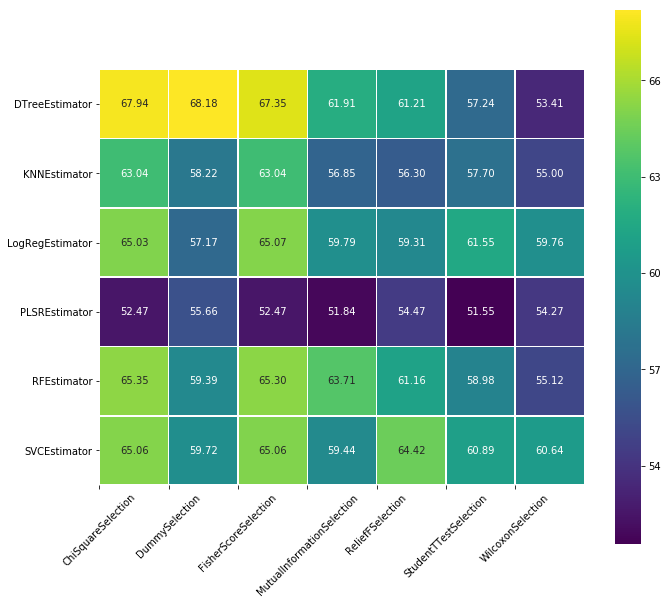

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    results_mat * 100,
    xticklabels=selector_lbls,
    yticklabels=estimator_lbls,
    vmin=np.nanmin(results_mat) * 100 - 1e-4, 
    vmax=np.nanmax(results_mat) * 100 + 1e-4,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.2f', 
    square=1, 
    linewidth=.5, 
    cbar=True,
    cbar_kws={'shrink': 0.8},  
)
plt.xticks(np.arange(7), rotation=45, ha='center')
plt.tight_layout()
#plt.savefig(
#    './../../../figures/50evals_50reps_univariate_dfs.png',
#    bbox_inches='tight',
#    transparent=True,
#    dpi=100, 
#)

In [9]:
# Observations:
# * Fisher score suboptimal because unable to serve all predictive features to DTree. Apparent by comparing to 
#   dummy selection.
# * PLSR generally bad. Tree methods (RF, Dtree) generally best. 
# * Larger variance in performance results among classifiers compared to among feature selectors.